In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('data_000637.txt')
data.head(5)

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0     1     0          123  3869200167        2374        26
1     1     0          124  3869200167        2374        27
2     1     0           63  3869200167        2553        28
3     1     0           64  3869200167        2558        19
4     1     0           64  3869200167        2760        25

In [3]:
#2) #since we have a high number of rows (i.e. data), we can suppose that some orbit has the max number of bx_count

bx_count = data['BX_COUNTER'].max() + 1 # +1 because we are counting from 0

print('Maxn° of bx in a orbit:', bx_count)

Maxn° of bx in a orbit: 3564


In [9]:
#3,4) 

data['TIME_NS'] = data['TDC_MEAS']*25/30 + data.BX_COUNTER*25 + data.ORBIT_CNT*bx_count*25 

elapsed_time = data.TIME_NS.max() - data.TIME_NS.min() 

print('Elapsed time in sec = %.4f s' %(elapsed_time*10e-9))

Elapsed time in sec = 9.8042 s


In [10]:
#5)

data.HEAD = np.random.choice([0, 1], data.shape[0])
data.head(5)

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS       TIME_NS
0     0     0          123  3869200167        2374        26  3.447457e+14
1     1     0          124  3869200167        2374        27  3.447457e+14
2     1     0           63  3869200167        2553        28  3.447457e+14
3     1     0           64  3869200167        2558        19  3.447457e+14
4     1     0           64  3869200167        2760        25  3.447457e+14

In [11]:
data_1 = data[data.HEAD == 1]

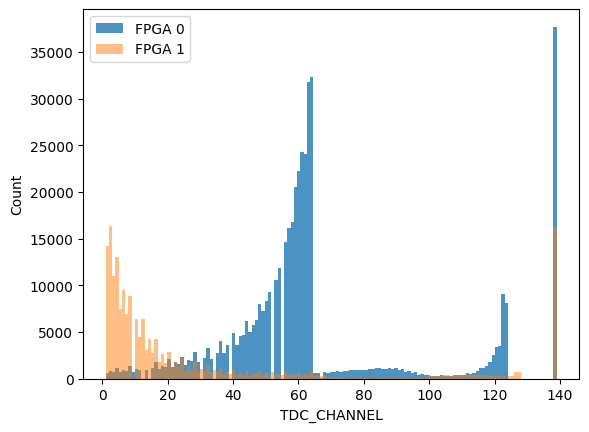

In [14]:
plt.hist(data_1[data_1.FPGA == 0].TDC_CHANNEL, bins=139, alpha=0.8, color='tab:blue', label='FPGA 0')
plt.hist(data_1[data_1.FPGA == 1].TDC_CHANNEL, bins=139, alpha=0.5, color='tab:orange', label='FPGA 1')
plt.legend()
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Count')
plt.show()


In [16]:
chan_max_0 = data_1[data_1.FPGA == 0].groupby(data_1.TDC_CHANNEL).size().sort_values(ascending=False)
chan_max_1 = data_1[data_1.FPGA == 1].groupby(data_1.TDC_CHANNEL).size().sort_values(ascending=False)

print(chan_max_0[:3])
print()
print(chan_max_1[:3])

TDC_CHANNEL
139    37701
64     32276
63     31799
dtype: int64

TDC_CHANNEL
2      16381
139    16262
1      14238
dtype: int64


In [17]:
uni_orbit = data_1.ORBIT_CNT.nunique()

uni_orbit_139 = data_1[data_1.TDC_CHANNEL == 139].ORBIT_CNT.nunique()


print(uni_orbit)
print()
print(uni_orbit_139)

10997

10837


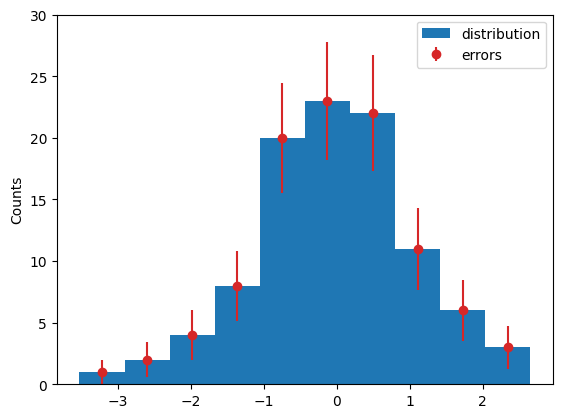

In [50]:
# np.random.seed(9725)
x = np.random.normal(loc=0, scale=1, size=(100,))

counts, bins = np.histogram(x, bins=int(np.sqrt(100)))

bin_center = (bins[:-1]+bins[1:])/2

errors = np.sqrt(counts)

plt.hist(x, bins=bins, label='distribution')
plt.errorbar(bin_center, counts, yerr=errors, fmt='o', color='tab:red', label='errors')
plt.legend()
plt.ylabel('Counts')
plt.yticks(np.arange(-0, (np.max(counts)+np.max(errors))+3,5) )
plt.show()

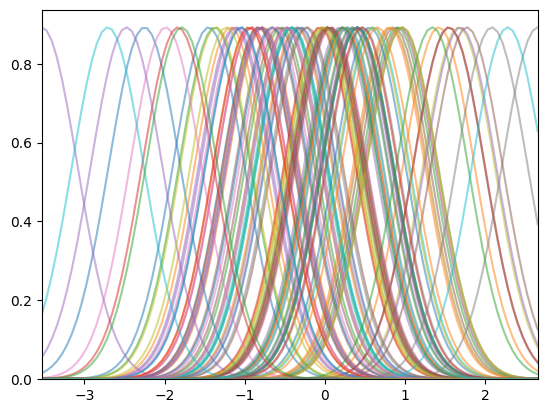

In [51]:
from scipy import stats
means = x
std = 1.06*x.std()*x.size**(-1/5.) 
t = np.linspace(x.min(), x.max(), 100)

gaussians = stats.norm.pdf(t[:, None], loc=means, scale=std).T

for gaus in gaussians:
    plt.plot(t, gaus, alpha=0.5)

plt.xlim(x.min(), x.max())
# plt.xticks(np.arange(int(x.min()), int(x.max()), 5))
plt.ylim(-0.001)
plt.show()

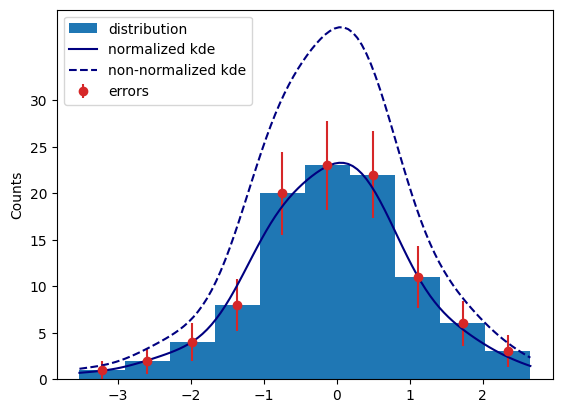

In [52]:
from scipy.integrate import trapz
g_sum = np.sum(gaussians, axis=0)
hist_area = trapz(counts, bin_center)
g_area = trapz(g_sum, t)

A = hist_area/g_area

plt.hist(x, bins=bins, label='distribution')
plt.errorbar(bin_center, counts, yerr=errors, fmt='o', color='tab:red', label='errors')

plt.plot(t, g_sum*A, label='normalized kde', color='navy')
plt.plot(t, g_sum, '--', color='navy', label='non-normalized kde')
plt.legend()
plt.ylabel('Counts')
plt.yticks(np.arange(-0, (np.max(counts)+np.max(errors))+3,5) )
plt.show()

<Axes: xlabel='x1', ylabel='y1'>

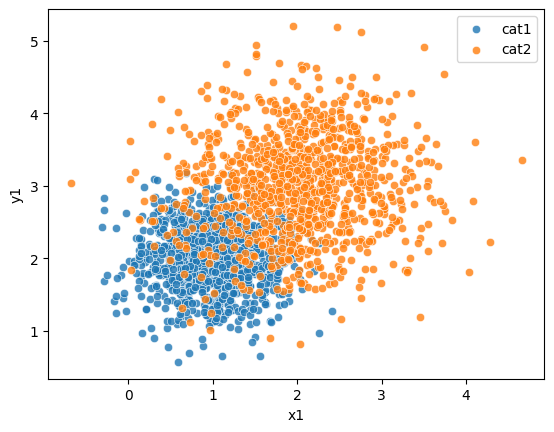

In [71]:
import seaborn as sns
def cat2_dataset(N, mean1, mean2, cov1, cov2):
    cat1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=N)
    cat2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=N)

    dataset = pd.DataFrame({'x1': cat1[:,0], 'y1': cat1[:,1], 'x2': cat2[:,0], 'y2': cat2[:,1]})
    return dataset

mean1 = [1, 2]
mean2 = [2, 3]

cov1 = np.diag([0.2, 0.2])
cov2 = np.diag([0.5, 0.5])

N = 1000 

dataset = cat2_dataset(N, mean1, mean2, cov1, cov2)

sns.scatterplot(dataset, x='x1', y='y1', label='cat1', alpha=0.8)
sns.scatterplot(dataset, x='x2', y='y2', label='cat2', alpha=0.8)

In [43]:
data = np.load('residuals_261.npy', allow_pickle=True).item()

df = pd.DataFrame(data)

df.head(3)

residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4

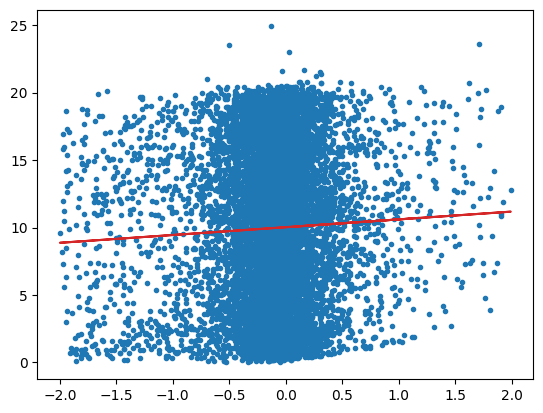

In [44]:
df = df[np.abs(df.residuals) < 2.]

results = stats.linregress(df.residuals, df.distances)

plt.scatter(df.residuals, df.distances, marker='.')
plt.plot(df.residuals, results.intercept + results.slope*df.residuals, color='tab:red', zorder=100)
plt.show()

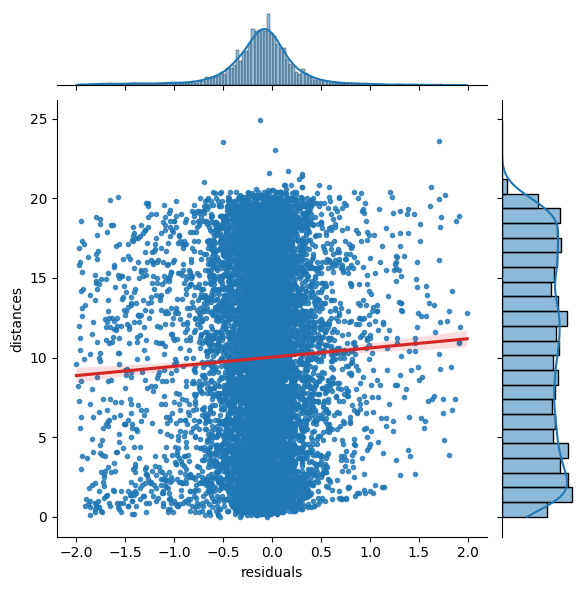

In [45]:
df['regr'] = results.intercept + results.slope*df.residuals
# sns.lineplot(df, x='residuals', y='regr', color='tab:green', zorder=100, linestyle='--')
sns.jointplot(df, x='residuals', y='distances', kind='reg', marker='.', line_kws={'zorder': 100, 'color': 'tab:red'})

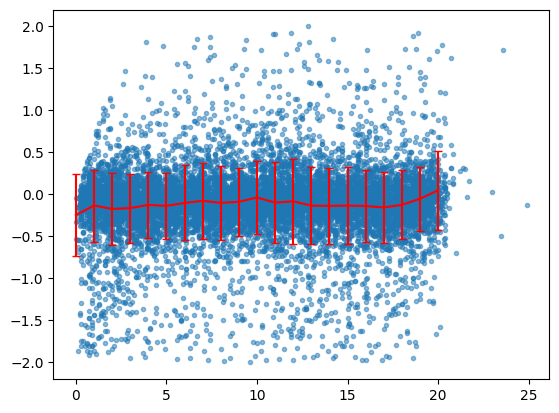

In [49]:
counts_d, bins_d = np.histogram(df.distances, bins=int(np.sqrt(df.shape[0])))

#x = (bins_d[:-1]+bins_d[1:])/2
x = np.linspace(0, 20, 21)
y = np.zeros_like(x)
erry = np.zeros_like(x)

for i in range(len(x)):
    y[int(i)] = np.mean(df[(df.distances >=i) & (df.distances < i+1)]['residuals'])
    # y[int(i)] = np.mean(df_clean[(df_clean['distances']>=i) & ( df_clean['distances']< i+1)]['residuals'])

    erry[int(i)] = np.std(df[(df.distances >=i) & (df.distances < i+1)]['residuals'])

plt.errorbar(x, y, erry, color='r', capsize=3, fmt='-')
plt.scatter(df.distances, df.residuals, marker='.', alpha=0.5)
plt.show()

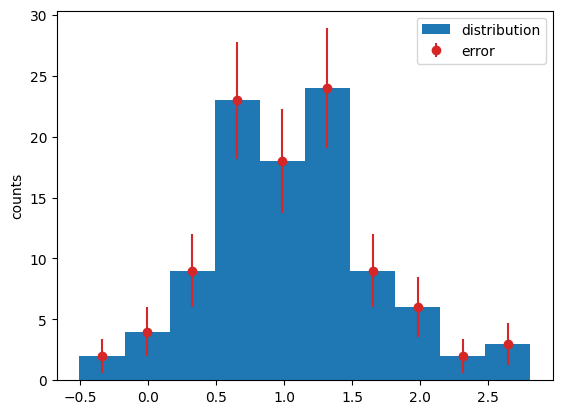

In [5]:
np.random.seed(9725)
x = np.random.normal(loc=1, scale=0.7, size=100)

counts, bins = np.histogram(x, bins=int(np.sqrt(100)))

err = np.sqrt(counts)

bin_center = (bins[:-1] + bins[1:])/2 

plt.hist(x, bins=bins, label='distribution')
plt.errorbar(bin_center, counts, yerr=err, fmt='o', color='tab:red', label='error')
plt.ylabel('counts')
plt.yticks(np.arange(-0.00, counts.max()+err.max()+2, 5))
plt.legend()
plt.show()

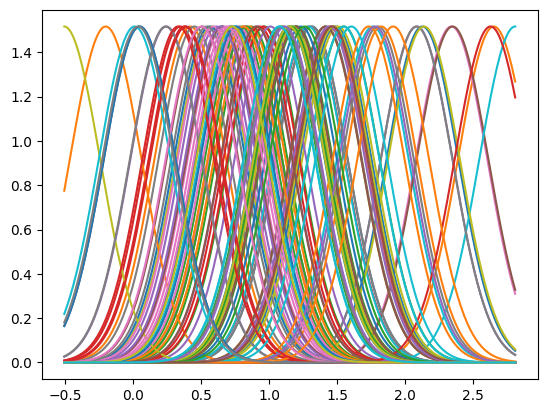

In [13]:
from scipy import stats

means = x
std = 1.06*x.std()*x.size**(-1/5)
t = np.linspace(x.min(), x.max(), 300)

gaussians = stats.norm.pdf(t[:, None], loc=means, scale=std).T

for gauss in gaussians:
    plt.plot(t, gauss)
plt.show()

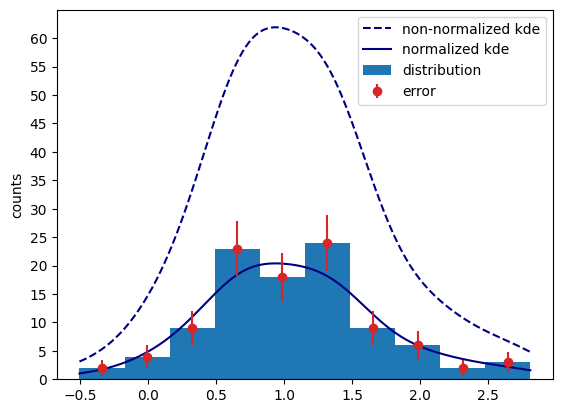

In [21]:
from scipy.integrate import trapz
g_sum = np.sum(gaussians, axis=0)
hist_area = trapz(counts, bin_center)
g_area = trapz(g_sum, t)

A = hist_area/g_area

plt.plot(t, g_sum, '--', label='non-normalized kde', color='navy')
plt.plot(t, g_sum*A, label='normalized kde', color='navy')
plt.hist(x, bins=bins, label='distribution')
plt.errorbar(bin_center, counts, yerr=err, fmt='o', color='tab:red', label='error')
plt.ylabel('counts')
plt.yticks(np.arange(-0.00, g_sum.max(), 5))
plt.legend()
plt.show()

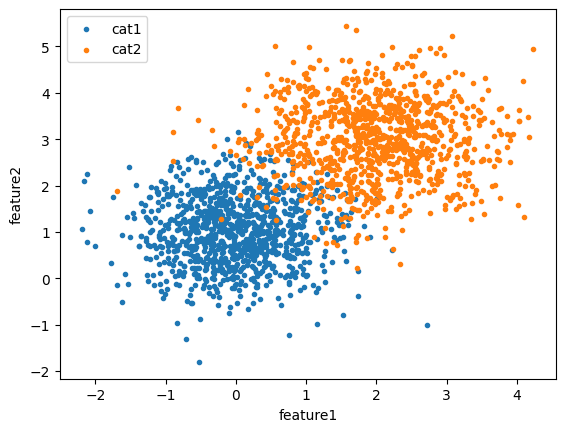

In [28]:
def cat2_dataset(N, mean1, mean2, cov1, cov2):
    cat1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=N)
    cat2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=N)
    
    dataset = np.hstack((cat1, cat2))
    
    return dataset

mean1 = [0, 1]
mean2 = [2, 3]

cov1 = np.diag([0.5, 0.5])
cov2 = np.diag([0.7, 0.7])

N = 1000

dataset = cat2_dataset(N, mean1, mean2, cov1, cov2)

plt.scatter(dataset[:,0], dataset[:,1], marker='.', color='tab:blue', label='cat1')
plt.scatter(dataset[:,2], dataset[:,3], marker='.', color='tab:orange', label='cat2')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.show()

In [30]:
data = np.load('./residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(data)

df.head(3)

residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4

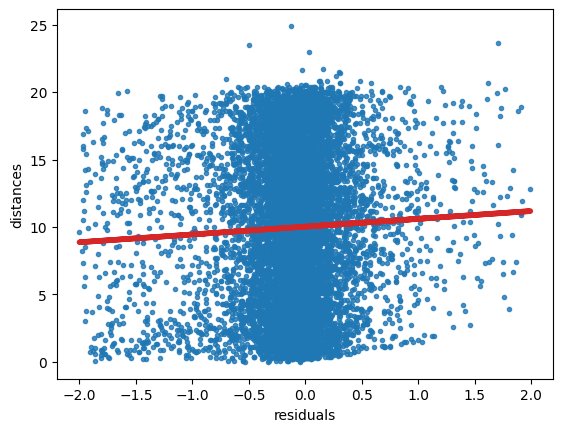

In [32]:
df = df[np.abs(df.residuals) < 2]

results = stats.linregress(df.residuals, df.distances)

plt.scatter(df.residuals, df.distances, marker='.', alpha=0.8)
plt.plot(df.residuals, results.intercept + df.residuals*results.slope, color='tab:red', zorder=100, linewidth=4)
plt.xlabel('residuals')
plt.ylabel('distances')
plt.show()

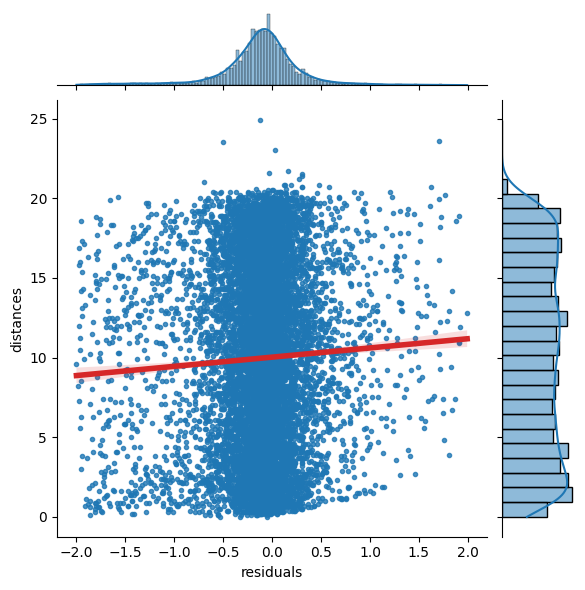

In [38]:
import seaborn as sns

sns.jointplot(df,x='residuals',y='distances', marker='.', kind='reg', line_kws={'zorder': 100, 'color': 'tab:red', 'linewidth': 4})
plt.show()

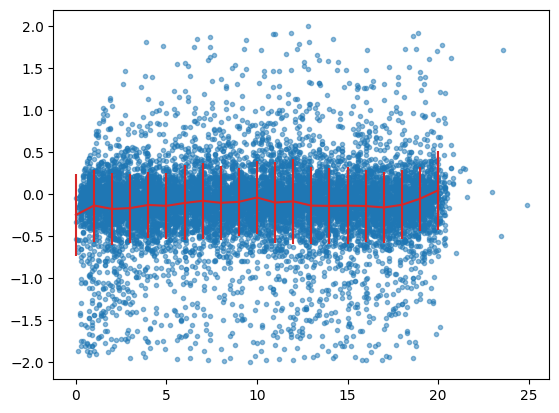

In [50]:
x = np.linspace(0,20,21)

y = np.zeros_like(x)
yerr = np.zeros_like(x)

for i in range(len(x)):
    y[i] = np.mean(df.residuals[(df.distances >= i) & (df.distances < i+1)])
    yerr[i] = np.std(df.residuals[(df.distances >= i) & (df.distances < i+1)])
    
plt.scatter(df.distances, df.residuals, marker='.', alpha=0.5)
plt.errorbar(x, y, yerr=yerr, color='tab:red', fmt='-')
plt.show()

In [56]:
from scipy import linalg as la
N=1000
x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = np.random.normal(loc=0, scale=3, size=N) + x1
x3 = 2*x1 + x2 
x = np.vstack((x1, x2, x3))
cov = np.cov(x)

print('cov matrix\n', cov, '\n')

eigval, eigvect = la.eig(cov)
print('eigval\n', eigval)
print()
print('eigvect\n', eigvect)

cov matrix
 [[ 0.9490482   0.89191787  2.79001427]
 [ 0.89191787  9.84444173 11.62827747]
 [ 2.79001427 11.62827747 17.208306  ]] 

eigval
 [2.60317396e+01+0.j 2.77119490e-17+0.j 1.97005632e+00+0.j]

eigvect
 [[-0.11022955 -0.81649658  0.5667299 ]
 [-0.58386999 -0.40824829 -0.70173297]
 [-0.80432909  0.40824829  0.43172683]]


In [73]:
u, spect, vt = np.linalg.svd(cov)

eigval_s = spect**2 / (N-1)

eigvect_s = u 

print('eigval_s\n', eigval_s)
print()
print('eigvect_s\n', eigvect_s)

eigval_s
 [6.78329796e-01 3.88500692e-03 3.22235439e-34]

eigvect_s
 [[-0.11022955  0.5667299  -0.81649658]
 [-0.58386999 -0.70173297 -0.40824829]
 [-0.80432909  0.43172683  0.40824829]]


In [74]:
D = np.diag(spect)    
SVD = np.dot(u,np.dot(D, vt))

LA = np.dot(eigvect, np.dot(np.diag(eigval), eigvect.T))

print('is cov ~ svd?', np.allclose(SVD, cov))
print('is cov ~ LA?', np.allclose(LA, cov))
print('are SVD and LA similar methods?', np.allclose(SVD, LA))

is cov ~ svd? True
is cov ~ LA? True
are SVD and LA similar methods? True


In [78]:
l_svd = np.sort(eigval_s)[::-1]
sum_l = np.sum(l_svd)

for i in range(len(l_svd)):
    print('Variability of %i PC is: %.2f' %(i+1, np.real_if_close(l_svd[i])*100/sum_l), '%\n')
    
cum_prob = np.cumsum(l_svd/sum_l)

idx = np.argmax(cum_prob >= 0.99) + 1

reduced_x = np.dot(eigvec_s[:, :idx].T, x)
print('Original data:')
print(x.shape)

print('\nReduced data (k=' + str(idx) +'):')
print(reduced_x.shape)

Variability of 1 PC is: 99.43 %

Variability of 2 PC is: 0.57 %

Variability of 3 PC is: 0.00 %

Original data:
(3, 1000)

Reduced data (k=1):
(1, 1000)


[]

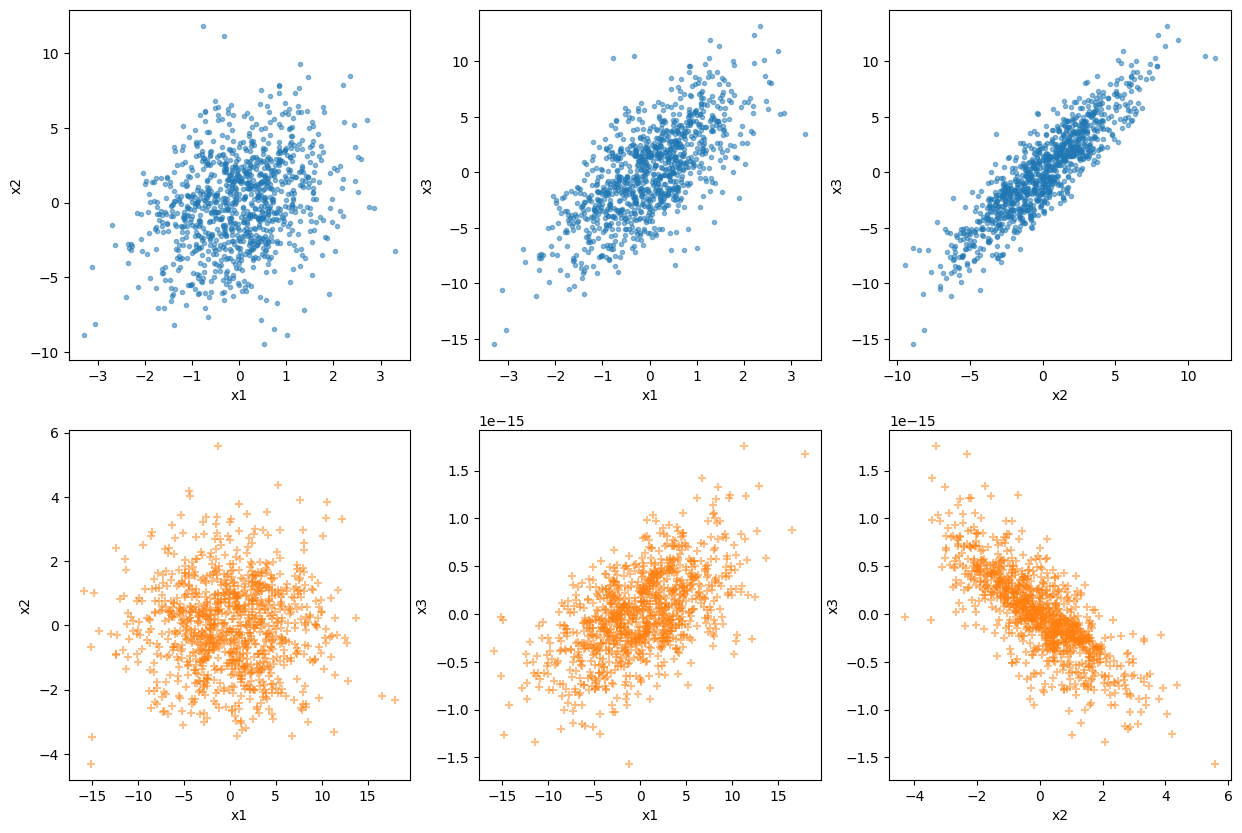

In [83]:
x_pca = np.dot(eigvec_s.T, x)

fig, ax = plt.subplots(2,3, figsize=(15,10))

ax[0,0].scatter(x[0], x[1], marker='.', alpha=0.5, color='tab:blue')
ax[0,0].set_xlabel('x1')
ax[0,0].set_ylabel('x2')
ax[0,1].scatter(x[0], x[2], marker='.', alpha=0.5, color='tab:blue')
ax[0,1].set_xlabel('x1')
ax[0,1].set_ylabel('x3')
ax[0,2].scatter(x[1], x[2], marker='.', alpha=0.5, color='tab:blue')
ax[0,2].set_xlabel('x2')
ax[0,2].set_ylabel('x3')

ax[1,0].scatter(x_pca[0], x_pca[1], marker='+', alpha=0.5, color='tab:orange')
ax[1,0].set_xlabel('x1')
ax[1,0].set_ylabel('x2')
ax[1,1].scatter(x_pca[0], x_pca[2], marker='+', alpha=0.5, color='tab:orange')
ax[1,1].set_xlabel('x1')
ax[1,1].set_ylabel('x3')
ax[1,2].scatter(x_pca[1], x_pca[2], marker='+', alpha=0.5, color='tab:orange')
ax[1,2].set_xlabel('x2')
ax[1,2].set_ylabel('x3')

plt.plot()

In [92]:
n1 = np.random.multivariate_normal(np.zeros(10), 1/50*np.diag(np.ones(10)), size=N)
n2 = np.random.multivariate_normal(np.zeros(10), 1/50*np.diag(np.ones(10)*3), size=N)
n3 = np.random.multivariate_normal(np.zeros(10), 1/50*np.diag(np.ones(10)), size=N)

n1 = n1.sum(axis=1)
n2 = n2.sum(axis=1)
n3 = n3.sum(axis=1)

noise = np.vstack((n1, n2, n3))

n_x = x + noise

cov_n = np.cov(n_x)

u_n, s_n, vt_n = np.linalg.svd(cov_n)

val_n = s_n**2/(N-1)
vect_n = u_n
D_n = np.diag(s_n)

svd_n = np.dot(vect_n, np.dot(D_n, vt_n))

print(np.allclose(cov_n, svd_n))

True


In [95]:
l_svd_n = np.sort(val_n)[::-1]
sum_l_n = np.sum(l_svd_n)

for i in range(len(l_svd)):
    print('Variability of %i PC is: %.2f' %(i+1, np.real_if_close(l_svd_n[i])*100/sum_l_n), '%\n')
    
cum_prob_n = np.cumsum(l_svd_n/sum_l_n)

idx_n = np.argmax(cum_prob_n >= 0.99) + 1

reduced_x_n = np.dot(vect_n[:, :idx_n].T, n_x)
print('Original data:')
print(n_x.shape)

print('\nReduced data (k=' + str(idx_n) +'):')
print(reduced_x_n.shape)

Variability of 1 PC is: 99.19 %

Variability of 2 PC is: 0.80 %

Variability of 3 PC is: 0.01 %

Original data:
(3, 1000)

Reduced data (k=1):
(1, 1000)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

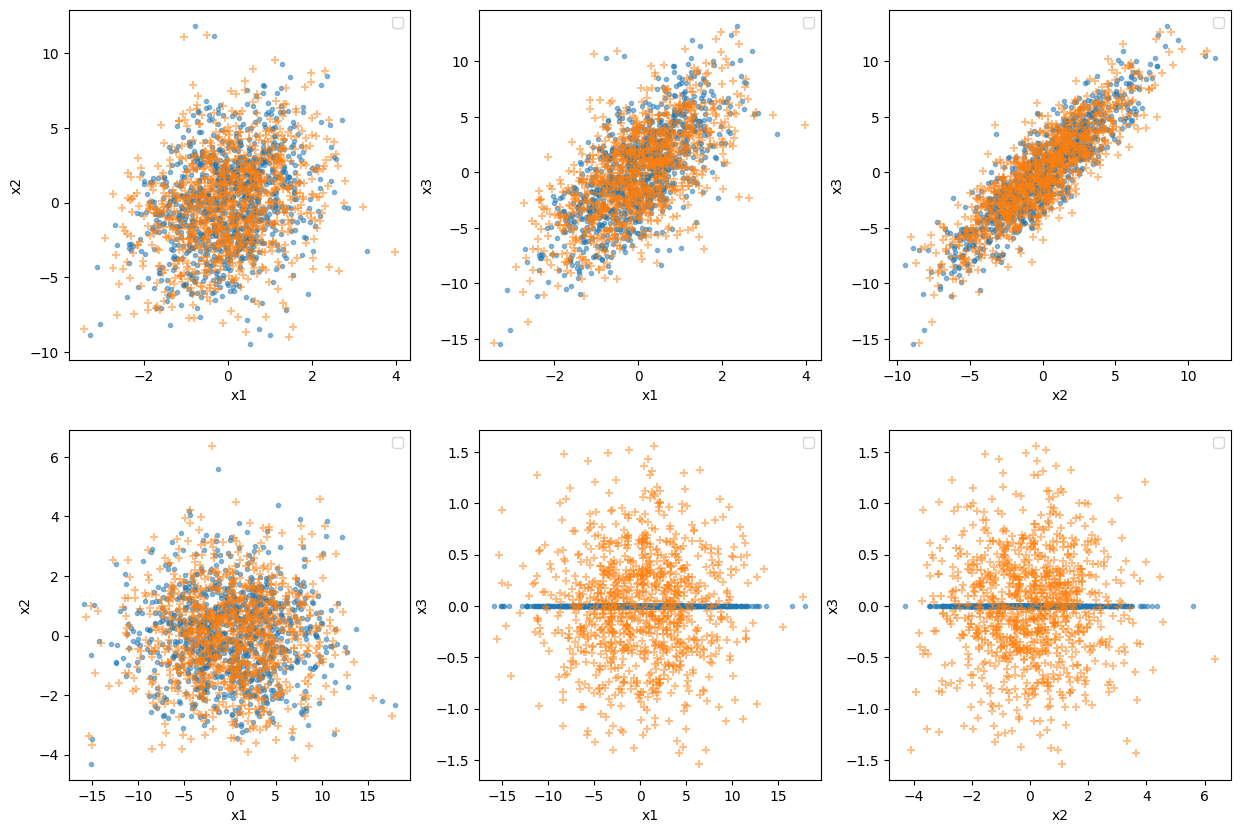

In [99]:
x_pca_n = np.dot(vect_n.T, n_x)
fig, ax = plt.subplots(2,3, figsize=(15,10))

ax[0,0].scatter(x[0], x[1], marker='.', alpha=0.5, color='tab:blue')
ax[0,0].set_xlabel('x1')
ax[0,0].set_ylabel('x2')
ax[0,1].scatter(x[0], x[2], marker='.', alpha=0.5, color='tab:blue')
ax[0,1].set_xlabel('x1')
ax[0,1].set_ylabel('x3')
ax[0,2].scatter(x[1], x[2], marker='.', alpha=0.5, color='tab:blue')
ax[0,2].set_xlabel('x2')
ax[0,2].set_ylabel('x3')
ax[0,0].scatter(n_x[0], n_x[1], marker='+', alpha=0.5, color='tab:orange')
ax[0,1].scatter(n_x[0], n_x[2], marker='+', alpha=0.5, color='tab:orange')
ax[0,2].scatter(n_x[1], n_x[2], marker='+', alpha=0.5, color='tab:orange')


ax[1,0].scatter(x_pca[0], x_pca[1], marker='.', alpha=0.5, color='tab:blue')
ax[1,0].set_xlabel('x1')
ax[1,0].set_ylabel('x2')
ax[1,1].scatter(x_pca[0], x_pca[2], marker='.', alpha=0.5, color='tab:blue')
ax[1,1].set_xlabel('x1')
ax[1,1].set_ylabel('x3')
ax[1,2].scatter(x_pca[1], x_pca[2], marker='.', alpha=0.5, color='tab:blue')
ax[1,2].set_xlabel('x2')
ax[1,2].set_ylabel('x3')

ax[1,0].scatter(x_pca_n[0], x_pca_n[1], marker='+', alpha=0.5, color='tab:orange')
ax[1,1].scatter(x_pca_n[0], x_pca_n[2], marker='+', alpha=0.5, color='tab:orange')
ax[1,2].scatter(x_pca_n[1], x_pca_n[2], marker='+', alpha=0.5, color='tab:orange')

for i in range(2):
    for j in range(3):
        ax[i,j].legend()

plt.plot()

In [130]:
import scipy.interpolate as sci

max_speeds = np.load('./max-speeds.npy')
years_nb = max_speeds.shape[0]

N = 21
cum_prob = [i/(N+1)for i in range(years_nb)]

max_speeds = np.sort(max_speeds)

quantile = sci.UnivariateSpline(max_speeds, cum_prob)

fifty_prob = 1. - 0.02

fifty_wind = quantile(fifty_prob)

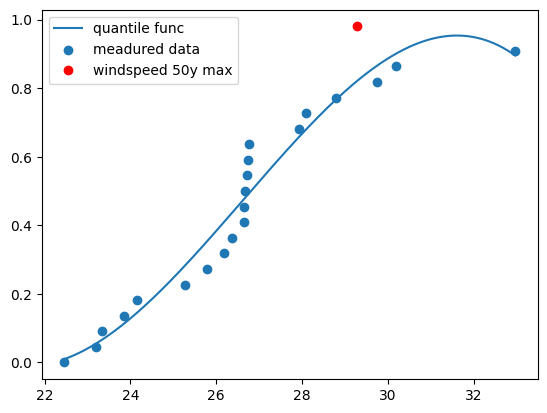

In [132]:
x = np.linspace(max_speeds.min(), max_speeds.max(), 1000)
y = quantile(x)
plt.plot(x, y, label='quantile func')
plt.scatter(max_speeds, cum_prob, label='meadured data')
plt.plot(fifty_wind, fifty_prob, 'ro', label='windspeed 50y max')
plt.legend()

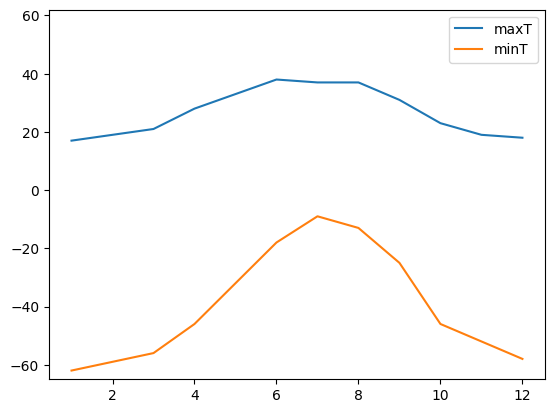

In [138]:
max_t = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_t = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

t = np.linspace(1, 12, 12)

plt.plot(t, max_t, label='maxT')
plt.plot(t, min_t, label='minT')
plt.ylim(-65, 62)
plt.legend()

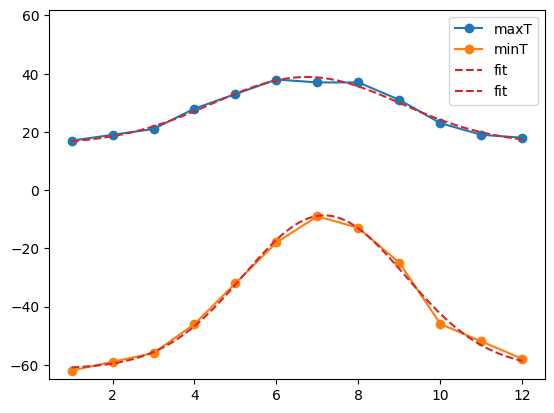

In [141]:
import scipy.optimize as sco
def t_func(x, M, s, A, p):
    return A/np.sqrt(2*np.pi*s**2) * np.exp(-0.5*(x-M)**2/(s**2)) + p

par_max, _ = sco.curve_fit(t_func, t, max_t, p0=(7, 1, 1, 20))
par_min, _ = sco.curve_fit(t_func, t, min_t, p0=(7, 1, 1, -60))

t_i = np.linspace(1,12,100)

plt.plot(t, max_t, 'o-', label='maxT')
plt.plot(t, min_t, 'o-', label='minT')
plt.plot(t_i, t_func(t_i, *par_max), '--', color='tab:red', label='fit')
plt.plot(t_i, t_func(t_i, *par_min), '--', color='tab:red', label='fit')
plt.ylim(-65, 62)
plt.legend()

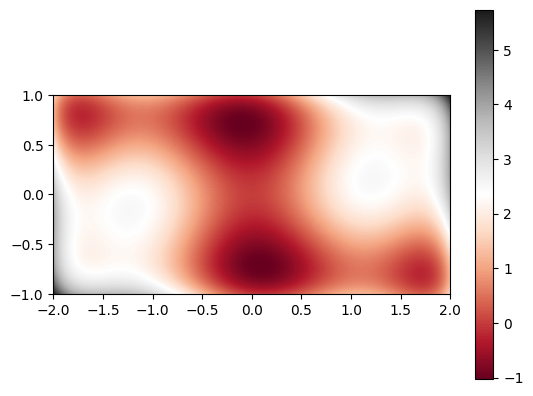

In [143]:
def six_f(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2

x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 1, 1000)

mesh_x, mesh_y = np.meshgrid(x, y)

z = six_f([mesh_x,mesh_y])

plt.imshow(z, extent=[-2,2,-1,1], origin='lower', cmap='RdGy')
plt.colorbar()
plt.show()

In [146]:
guesses = [[0.1, -0.6], [-0.1, 0.7]]

for guess in guesses:
    min_res = sco.minimize(six_f, x0=guess)
    print('init guess:', guess, '\n', min_res, '\n\n')

init guess: [0.1, -0.6] 
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.0316284534884803
        x: [ 8.984e-02 -7.127e-01]
      nit: 5
      jac: [ 4.023e-06 -2.906e-06]
 hess_inv: [[ 1.318e-01 -9.204e-03]
            [-9.204e-03  6.205e-02]]
     nfev: 24
     njev: 8 


init guess: [-0.1, 0.7] 
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.031628453489714
        x: [-8.984e-02  7.127e-01]
      nit: 4
      jac: [-1.490e-08 -2.190e-06]
 hess_inv: [[ 1.295e-01 -7.951e-03]
            [-7.951e-03  6.169e-02]]
     nfev: 21
     njev: 7 




C:\Users\gabri\AppData\Local\Temp\ipykernel_7876\3190647513.py:1: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  min_res = sco.minimize(six_f, x0=guesses)


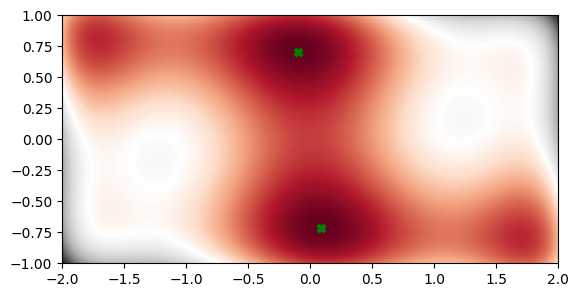

In [147]:
min_res = sco.minimize(six_f, x0=guesses)
plt.imshow(z, extent=[-2,2,-1,1], origin='lower', cmap='RdGy')
plt.scatter(min_res['x'][0], min_res['x'][1], marker='X', color='green')
plt.scatter(min_res['x'][2], min_res['x'][3], marker='X', color='green')
plt.show()

In [148]:
min_res = sco.minimize(six_f, x0=[0,0])
min_res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [ 5.960e-08 -5.960e-08]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1

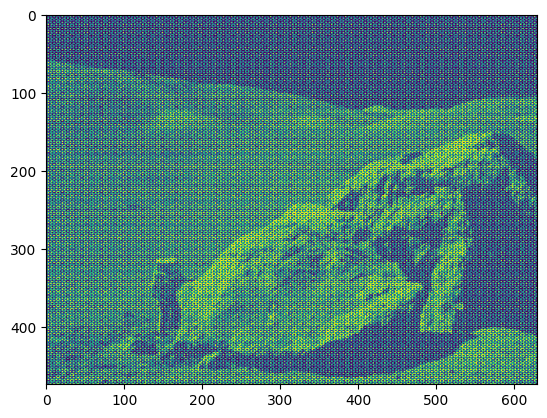

In [151]:
img = plt.imread('./moonlanding.png')
plt.imshow(img)
plt.show()

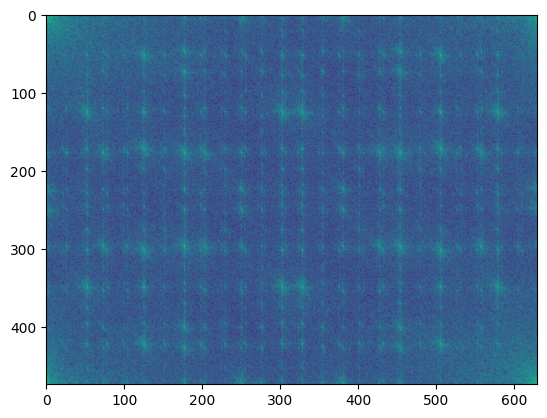

In [163]:
import scipy.fft as fft
fftt = fft.fft2(img)
plt.imshow(np.log(1+np.abs(fftt)))

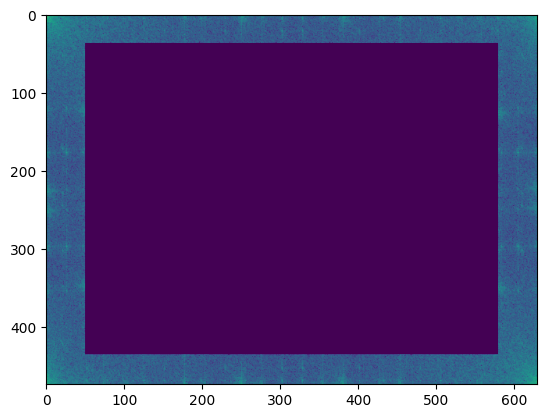

In [174]:
mask = np.ones_like(fftt)
r, c = fftt.shape 
mask[int(r*0.08):int(r*0.92), int(c*0.08):int(c*0.92)] = 0

fft_cp = fftt.copy()

fft_cp = fft_cp*mask 
plt.imshow(np.log(1+np.abs(fft_cp)))


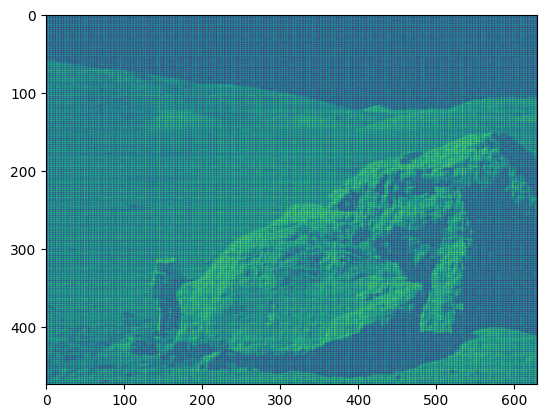

In [175]:
new_img = fft.ifft2(fft_cp)

plt.imshow(new_img.real)

In [210]:
Tl_i = 1000
Pb_i = 0

tau = 3.052*60/np.log(2)

def decay(t, tau):
    return 1-2**(-t/tau)

Tl_f = np.zeros(1000)
Pb_f = np.zeros(1000)

u = np.random.uniform(size=1000)


Tl_f[0] = Tl_i

for t in range(1, 1000):
    prob = len(u[u<decay(t, tau)])
    
    Tl_f[t] = Tl_i - prob
    Pb_f[t] = Pb_i + prob
    

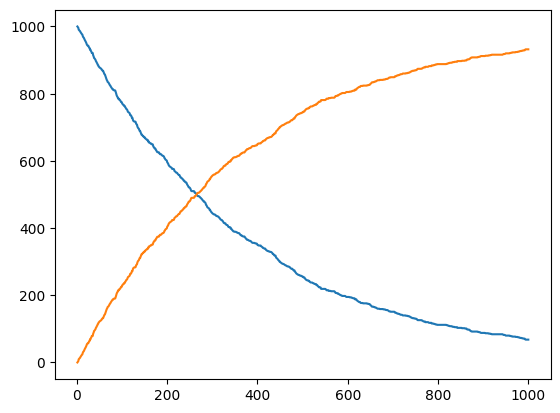

In [213]:
time = np.linspace(1,1000, 1000)
plt.plot(time, Tl_f)
plt.plot(time, Pb_f)

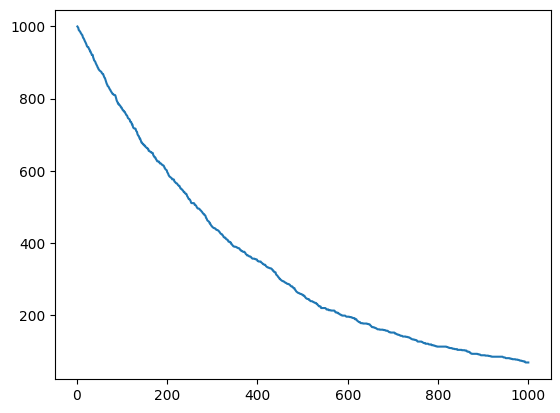

In [217]:
def prob(t, tau):
    return 2**(-t/tau)*np.log(2)/tau

def i_prob(t, tau):
    return -tau*np.log2(1-t)

v = i_prob(u, tau)

Tl = np.zeros(1000)

Tl[0] = Tl_i

for t in range(1, 1000):
    Tl[t] = Tl_i - len(v[v<t])

plt.plot(time, Tl)

In [262]:
import scipy.constants as spc
a = spc.physical_constants['Bohr radius'][0]
sigma = a/100
Z = 79
E = 7.7*10e6
e = spc.e
eps = spc.epsilon_0
num_part = 1_000_000
an = np.pi/2

def theta(b,Z,E):
    return 2*np.arctan((Z*e**2)/(2*np.pi*eps*E*b))

#defining the beam
mu   = [0,0]
cov  = np.eye(2)*(sigma)**2
beam = np.random.multivariate_normal(mu, cov, num_part).T

#bouncing-back particles
b = np.sqrt(np.sum(beam**2 , axis=0))
scattering_angle = theta(b, Z=Z, E=E*e)

back_part = scattering_angle[scattering_angle > an]

print("The fraction of the 𝛼 particles that backscatter ( 𝜃 > 𝜋/2 ) is %2.6f %%" %(len(back_part)*100/num_part))
print("The particles that bounce-back are %4.0f over 1e6" %(len(back_part)) )


The fraction of the 𝛼 particles that backscatter ( 𝜃 > 𝜋/2 ) is 0.001600 %
The particles that bounce-back are   16 over 1e6


In [263]:
def func(x):
    return np.sin(1/(x*(2-x)))**2

t_step = 1_000_000

def hit_miss(func, a, b, N):
    x = np.random.uniform(a, b, N)
    y = np.random.uniform(0, 1, N)
    
    fx = func(x)
    hits = np.sum(y < fx)
    
    integral = (b-a)*hits/N
    error = (b-a)*np.sqrt((fx**2).mean() - (fx.mean())**2) / np.sqrt(N)
    
    return integral, error

integral_hit, error_hit = hit_miss(func, 0, 2, t_step)

print('I value:', integral_hit)
print('error:', error_hit)

I value: 1.451116
error: 0.0005269699939550391


In [264]:
def mean(func, a, b, N):
    x = np.random.uniform(a, b, N)
    fx = func(x)
    integral = (b-a)*np.sum(fx) / N
    error = (b-a)*np.sqrt((fx**2).mean() - (fx.mean())**2)/np.sqrt(N)

    return integral, error

integral_m, error_m = mean(func, 0, 2, t_step)

print('I value:', integral_m)
print('error:', error_m)

I value: 1.4515201852724704
error: 0.0005267259735070173


In [268]:
def circ(x, y):
    if x**2+y**2 <= 1:
        return 1
    else: return 0
    
points = np.random.uniform(-1, 1, (t_step, 2))

count = 0

for i in range(t_step):
    count += circ(points[i,0], points[i,1])
    
integral = 4*count/t_step

print(integral)


3.142116


In [275]:
def circV(x):
    if np.sum([i**2 for i in x]) <=1:
        return 1
    else: return 0
    
n_dim = 10

V_dim = 2**n_dim

points = np.random.uniform(-1, 1, (t_step, n_dim))

count = 0
for i in range(t_step):
    count += circV(points[i,:])
    
integral = V_dim*count/t_step 

print(integral)

2.564096


In [280]:
def eexp(x):
    return x**(-0.5) / (np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

def importance(func, weigth, a, b, N):
    x = np.random.uniform(a, b, N)
    fx = func(x)
    wx = weigth(x)
    summ = np.sum(fx/wx)
    
    def w_int(weigth, a, b, N):
        #x = np.random.uniform(a, b, N)
        int_w = (b-a)*np.sum(weigth(x))/N
        return int_w
    
    int_w = w_int(weigth, a, b, N)
    
    integral = summ*int_w/N
    
    return integral

integral = importance(eexp, w, 0, 1, t_step)

print(integral)

0.7569417410047391
